In [74]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [75]:
x = [94, 197, 16, 38, 99, 141, 23]
y = [52, 104, 146, 10, 51, 30, 40, 27, 46]
x_mean = np.mean(x)
y_mean = np.mean(y)
x_med = np.median(x)
y_med= np.median(y)
print('x_mean =', x_mean)
print('y_mean =', y_mean)
print('x_mean - y_mean =', x_mean - y_mean)
print('x_med =', x_med)
print('y_med =', y_med)
print('x_med - y_med =', x_med - y_med)

x_mean = 86.85714285714286
y_mean = 56.22222222222222
x_mean - y_mean = 30.63492063492064
x_med = 94.0
y_med = 46.0
x_med - y_med = 48.0


In [76]:
std_err_x = np.std(x, ddof=1) / np.sqrt(len(x))
std_err_y = np.std(y, ddof=1) / np.sqrt(len(y))
print('standard error for x mean:', std_err_x)
print('standard error for y mean:', std_err_y)

standard error for x mean: 25.235489533052238
standard error for y mean: 14.158603369778957


In [77]:
def bootstrap_means(x, n_boot, seed=None):

    rng = np.random.RandomState(seed)
    sample_means = np.zeros(shape=n_boot)
    
    for i in range(n_boot):
        boot_sample = rng.choice(x, size=len(x), replace=True)
        sample_means[i] = np.mean(boot_sample)
    return sample_means

In [78]:
seed_val = 123
n_boot = 1000

In [79]:
x_boot_means = bootstrap_means(x, n_boot, seed = seed_val)
y_boot_means = bootstrap_means(y, n_boot, seed = seed_val)

x_mean_boot_std = np.std(x_boot_means, ddof=1)
y_mean_boot_std = np.std(y_boot_means, ddof=1)
std_diff_means = np.sqrt(x_mean_boot_std ** 2 + y_mean_boot_std ** 2)


print('bootstrap standard error estimate for x mean = ', x_mean_boot_std)
print('bootstrap standard error estimate for y mean = ', y_mean_boot_std)
print('bootstrap std error est for the diff between the two means = ', std_diff_means)
print('observed difference in the means', x_mean - y_mean)

bootstrap standard error estimate for x mean =  22.64711780792935
bootstrap standard error estimate for y mean =  13.648409487494447
bootstrap std error est for the diff between the two means =  26.441842343992583
observed difference in the means 30.63492063492064


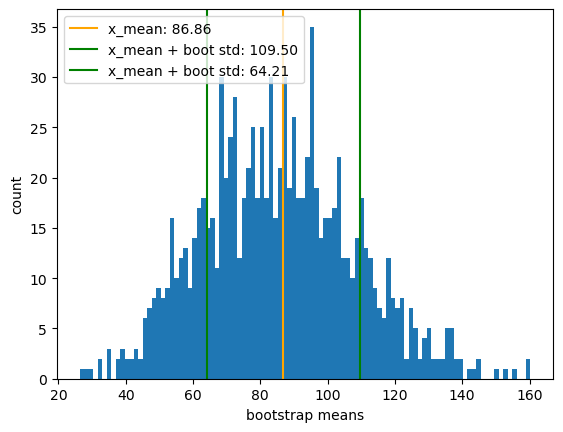

In [80]:
x_mean_plus_std = x_mean + x_mean_boot_std
x_mean_minus_std = x_mean - x_mean_boot_std 

plt.hist(x_boot_means, bins=int(n_boot/10))
plt.axvline(x_mean, color='orange', label='x_mean: %.2f' % x_mean)
plt.axvline(x_mean_plus_std, color='green', label='x_mean + boot std: %.2f' % x_mean_plus_std)
plt.axvline(x_mean_minus_std, color='green', label='x_mean + boot std: %.2f' % x_mean_minus_std)
plt.xlabel('bootstrap means')
plt.ylabel('count')
plt.legend(loc=2)
plt.show()

In [81]:
x_lower, x_upper = np.percentile(x_boot_means, [2.5, 97.5])
y_lower, y_upper = np.percentile(y_boot_means, [2.5, 97.5])


print('95%% confidence interval for the x mean: [%.2f, %.2f]' % (x_lower, x_upper))
print('95%% confidence interval for the y mean: [%.2f, %.2f]' % (y_lower, y_upper))

95% confidence interval for the x mean: [46.27, 132.47]
95% confidence interval for the y mean: [32.89, 86.90]


In [82]:
def bootstrap_medians(x, n_boot, seed=None):

    rng = np.random.RandomState(seed)
    sample_medians = np.zeros(shape=n_boot)
    
    for i in range(n_boot):
        boot_sample = rng.choice(x, size=len(x), replace=True)
        sample_medians[i] = np.median(boot_sample)
    return sample_medians

In [83]:
x_boot_medians = bootstrap_medians(x, n_boot, seed = seed_val)
y_boot_medians = bootstrap_medians(y, n_boot, seed = seed_val)

x_medians_boot_std = np.std(x_boot_medians, ddof=1)
y_medians_boot_std = np.std(y_boot_medians, ddof=1)

std_diff_medians = np.sqrt(x_medians_boot_std ** 2 + y_medians_boot_std ** 2)

print('bootstrap standard error estimate for x median = ', x_medians_boot_std)
print('bootstrap standard error estimate for y median = ', y_medians_boot_std)
print('bootstrap std error est for the diff between the two medians = ', std_diff_medians)
print('observed difference in the medians', x_med - y_med)

bootstrap standard error estimate for x median =  37.61398856989426
bootstrap standard error estimate for y median =  14.024475637859581
bootstrap std error est for the diff between the two medians =  40.14346837348578
observed difference in the medians 48.0


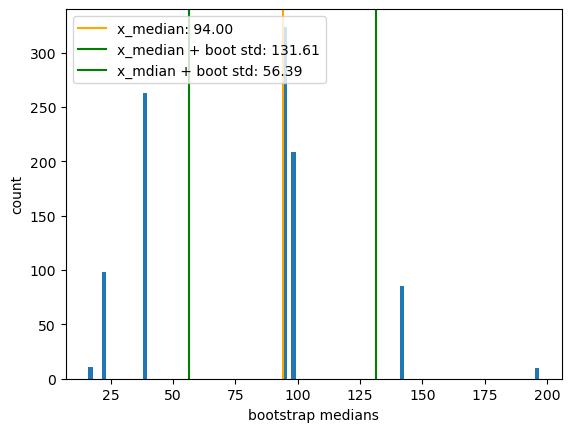

In [84]:
x_med_plus_std = x_med + x_medians_boot_std
x_med_minus_std = x_med - x_medians_boot_std 

plt.hist(x_boot_medians, bins=int(n_boot/10))
plt.axvline(x_med, color='orange', label='x_median: %.2f' % x_med)
plt.axvline(x_med_plus_std, color='green', label='x_median + boot std: %.2f' % x_med_plus_std)
plt.axvline(x_med_minus_std, color='green', label='x_mdian + boot std: %.2f' % x_med_minus_std)
plt.xlabel('bootstrap medians')
plt.ylabel('count')
plt.legend(loc=2)
plt.show()